In [1]:
#import pertinent packages
import pandas as pd
import math
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [2]:
#Insert folder name with csv file that you wish to calculate total error for
FOLDERNAME = os.path.abspath(r'''C:\Users\Marissa\Desktop\Research\Transits\TMMT\TOI-532\20201215_TOI-532\0_results\5_20_30\Best_Reduction''')
regex = "*.xls"
files = glob.glob(os.path.join(FOLDERNAME,regex))
listToStr = ''.join(map(str, files))
df = pd.read_csv(listToStr, sep='\t')

In [3]:
#Enter diameter (D) of telescope in cm 
# Diameter for both TMMT/LCOBOT
D = 0.3*100 
# Diameter for ARCTIC
#D = 3.5*100
#Enter exposure time in  seconds (t)
t = df['EXPTIME']
#t = 29.95
#Enter airmass of observations (X)
X = df['AIRMASS']
#X = 1.3
#Enter altitude of telescope in meters (h) 
# true for both TMMT/LCOBOT)
h = 2286
#Altitude for ARCTIC
#h = 2781.

In [4]:
#Calculate the expected scintillation noise for a given star
sig_s = 0.09 * (D ** (-2./3.)) * (X ** (1.75)) * ((2. * t) ** -0.5) * np.exp(-h/8000.)

In [5]:
#Calculates number of reference stars
ref_stars = [col for col in df.columns if 'rel_flux_C' in col]
n_e = len(ref_stars)
print(n_e)
#Calculates the scintillation error

sig_scint = 1.5 * sig_s * (1 + 1/(n_e)) ** (1/2)
print(sig_scint)

9
0      0.002117
1      0.002077
2      0.002040
3      0.002004
4      0.001969
         ...   
165    0.003411
166    0.003515
167    0.003625
168    0.003740
169    0.003860
Length: 170, dtype: float64


In [6]:
#Normalize Rel_Flux_T1 and Rel_Flux_err_T1
med = np.median(df['rel_flux_T1'])
mean = np.mean(df['rel_flux_T1'])
#print(med)
#print(mean)
norm_flux = df['rel_flux_T1'] / med
norm_flux_err = df['rel_flux_err_T1'] / med
print(norm_flux_err)

0      0.003633
1      0.003646
2      0.003633
3      0.003595
4      0.003608
         ...   
165    0.003800
166    0.003838
167    0.003863
168    0.003940
169    0.004043
Name: rel_flux_err_T1, Length: 170, dtype: float64


In [7]:
#Calculates the total error from relative flux T1 and scintillation

sig_total = ((norm_flux_err) ** 2 + (sig_scint) ** 2) ** (1/2)
print(sig_total)

0      0.004205
1      0.004196
2      0.004167
3      0.004116
4      0.004110
         ...   
165    0.005106
166    0.005204
167    0.005298
168    0.005433
169    0.005589
Length: 170, dtype: float64


In [8]:
#Adds a new column to the end of excel sheet with total error from rel_flux_T1 and scintillation noise added in quadrature
df.insert(len(df.columns), "Total_error", sig_total)
print(df.head)

<bound method NDFrame.head of                                              Label  slice     Saturated  \
0      1  Processed_l20201215-015706-TOI-532-I.fit    0.0  68637.429688   
1      2  Processed_l20201215-015926-TOI-532-I.fit    0.0  68387.898438   
2      3  Processed_l20201215-020144-TOI-532-I.fit    0.0  67780.695312   
3      4  Processed_l20201215-020402-TOI-532-I.fit    0.0  67748.734375   
4      5  Processed_l20201215-020621-TOI-532-I.fit    0.0  68170.812500   
..   ...                                       ...    ...           ...   
165  166  Processed_l20201215-082126-TOI-532-I.fit    0.0      0.000000   
166  167  Processed_l20201215-082345-TOI-532-I.fit    0.0      0.000000   
167  168  Processed_l20201215-082604-TOI-532-I.fit    0.0  63367.082031   
168  169  Processed_l20201215-082822-TOI-532-I.fit    0.0  67136.523438   
169  170  Processed_l20201215-083037-TOI-532-I.fit    0.0  66280.468750   

     J.D.-2400000        JD_UTC       JD_SOBS       HJD_UTC      BJD(

In [9]:
#Creates a new csv file with title editted to include w_tot_error
strip_regex = listToStr.rstrip('.xls')
df.to_csv(strip_regex +'_w_tot_error.xls', sep='\t', index=False)

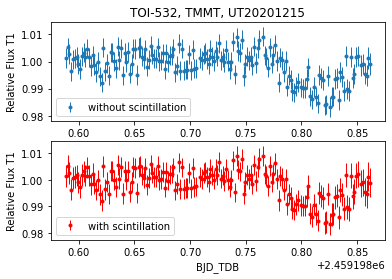

In [10]:
#Plot data with and without scintillation errorbars

x = df['BJD(TDB)']
y = norm_flux
yerr = norm_flux_err
#plt.figure(figsize=(25,50))
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.errorbar(x, y, yerr=yerr, marker = 'o', markersize=3, elinewidth=1, label='without scintillation', ls='none')
ax1.set_ylabel('Relative Flux T1')
ax1.set_xlabel('BJD_TDB')
ax1.set_title('TOI-532, TMMT, UT20201215')
ax1.legend(loc='lower left')

ax2.errorbar(x, y, yerr=sig_total, marker = 'o', markersize=3, color='red', elinewidth=1, label='with scintillation', ls='none')
ax2.set_ylabel('Relative Flux T1')
ax2.set_xlabel('BJD_TDB')
ax2.legend(loc='lower left')
fig.savefig(FOLDERNAME + '\errorbar_plot.png')

In [57]:
#Cross check with iDiffuse

from __future__ import print_function
import numpy as np 
import pandas as pd 
import idiffuse
import pysynphot as S



In [60]:
arc = idiffuse.telescope.TelescopeARC()

In [61]:
arc.get_filter_filenames()

['C:\\Users\\Marissa\\anaconda3_2\\lib\\site-packages\\idiffuse\\filters\\arctic_qe.txt',
 'C:\\Users\\Marissa\\anaconda3_2\\lib\\site-packages\\idiffuse\\filters\\bess-b.txt',
 'C:\\Users\\Marissa\\anaconda3_2\\lib\\site-packages\\idiffuse\\filters\\bess-i.txt',
 'C:\\Users\\Marissa\\anaconda3_2\\lib\\site-packages\\idiffuse\\filters\\bess-r.txt',
 'C:\\Users\\Marissa\\anaconda3_2\\lib\\site-packages\\idiffuse\\filters\\bess-u.txt',
 'C:\\Users\\Marissa\\anaconda3_2\\lib\\site-packages\\idiffuse\\filters\\bess-v.txt',
 'C:\\Users\\Marissa\\anaconda3_2\\lib\\site-packages\\idiffuse\\filters\\semrock_857_30.txt',
 'C:\\Users\\Marissa\\anaconda3_2\\lib\\site-packages\\idiffuse\\filters\\sloan_g_filter.txt',
 'C:\\Users\\Marissa\\anaconda3_2\\lib\\site-packages\\idiffuse\\filters\\sloan_i_filter.txt',
 'C:\\Users\\Marissa\\anaconda3_2\\lib\\site-packages\\idiffuse\\filters\\sloan_r_filter.txt',
 'C:\\Users\\Marissa\\anaconda3_2\\lib\\site-packages\\idiffuse\\filters\\sloan_z_filter.txt']

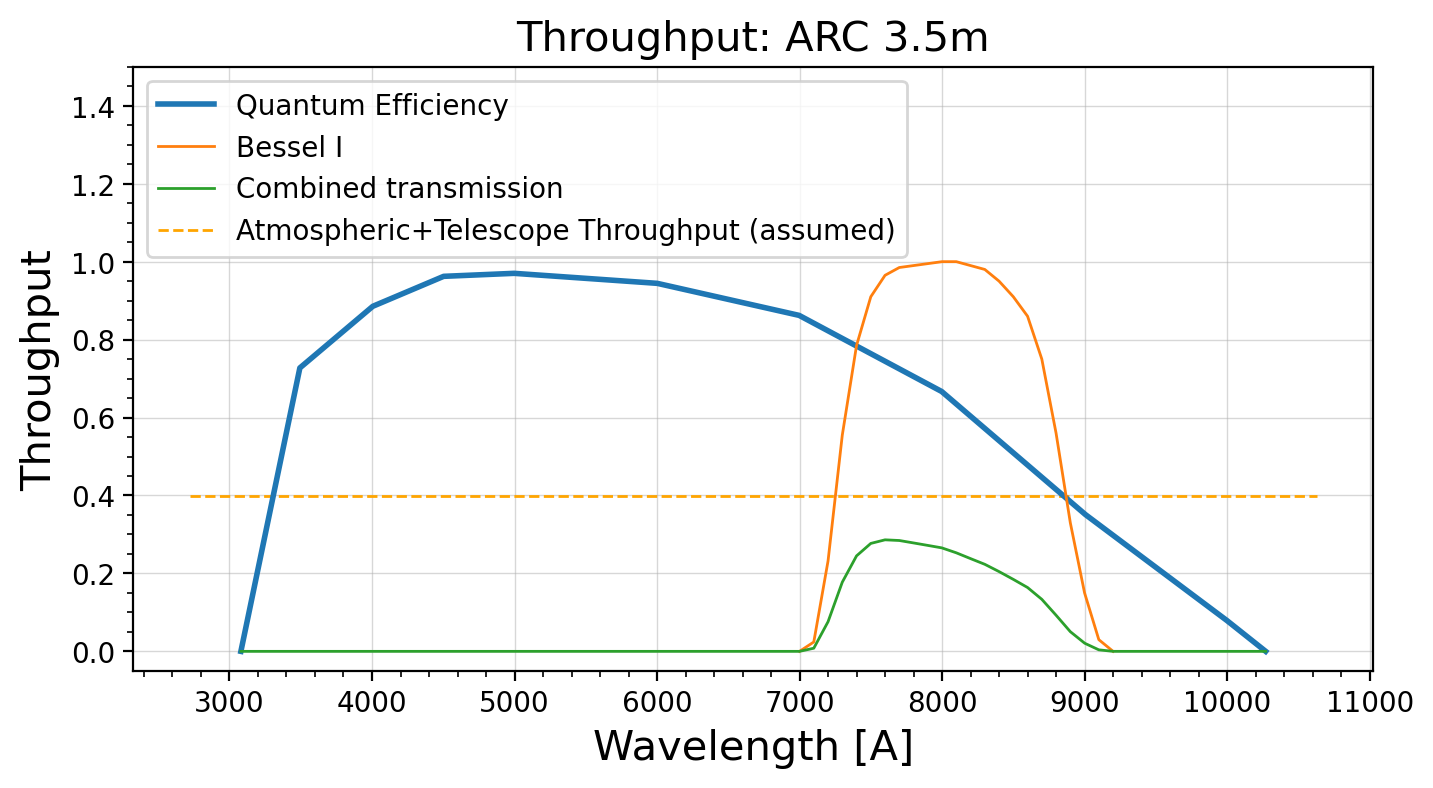

In [65]:
bessifilt = S.FileBandpass(arc.FILTER_DICT['bess-i.txt'])
arc.plot_throughput(bandpass=bessifilt, bandpass_name="Bessel I")

In [68]:
err, cad = arc.get_err_cad_for_adu(vegamag=14.413,
                        BandPass=bessifilt,
                        binning=4,
                        max_adu_per_pixel=2800.,
                        read_time=2.7,
                        airmass=1.3,
                        num_ref_stars=9.,
                        sky_mag_per_arcsec=19.7)

(((C:\Users\Marissa\anaconda3_2\lib\site-packages\idiffuse\filters\arctic_qe.txt * 0.398378) * C:\Users\Marissa\anaconda3_2\lib\site-packages\idiffuse\filters\bess-i.txt)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(((C:\Users\Marissa\anaconda3_2\lib\site-packages\idiffuse\filters\arctic_qe.txt * 0.398378) * C:\Users\Marissa\anaconda3_2\lib\site-packages\idiffuse\filters\bess-i.txt)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
##### Exptime #####
Exptime [s]:                  66.406
Total cadence [s]:            69.106
Obs. Efficiency [%]:          96.09
npix [pix]:                   307.30
n_b [pix]:                    537.77

##### Counts #####
Star counts - Total [adu]:    860439.86 
Star counts - /pix [adu/pix]: 2800.00 
Sky counts - Total [adu]:     392996.21
Sky counts - /pix [adu/pix]:  1278.87

##### Noise in exptime=66.41s ######
Photometric noise [ppm]       